<a href="https://colab.research.google.com/github/henrybearden/SYS3501/blob/main/BeardenH_3501L5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Henry Bearden zuf3ys SYS 3501 Lab 5

Q25

In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/spam.csv')

spamonly = df[df['v1'] == 'spam']

print(spamonly.duplicated(subset='v2').sum())

94


Q26

In [ ]:
print(len(spamonly.drop_duplicates(subset='v2')))

653


Q27

In [ ]:

df = pd.read_csv('/content/sample_data/spam.csv')

df_no_duplicates = df.drop_duplicates(subset='v2')
print(len(df_no_duplicates))

df_no_duplicates['message_length'] = df_no_duplicates['v2'].str.len()

average_length = df_no_duplicates['message_length'].mean()

print(round(average_length, 2))


5169


<ipython-input-17-b2d96ebeec42>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['message_length'] = df_no_duplicates['v2'].str.len()


78.98

Q28

In [ ]:
df['sentences_count'] = df['v2'].apply(lambda x: len(str(x).split('.')) if isinstance(x, str) else 0)

print(df.drop_duplicates(subset='v2')['sentences_count'].max())

42


Q29

In [ ]:
df_deduplicated = df.drop_duplicates(subset='v2')
print(df_deduplicated['v2'].str.split().str.len().min())

1


Q30

In [ ]:
def count_uppercase(text):
  count = 0
  for char in str(text):
    if 'A' <= char <= 'Z':
      count += 1
  return count

uppercase_counts = df_deduplicated['v2'].head(5).apply(count_uppercase)

print(uppercase_counts.max())


10


Q31

<ipython-input-21-e9d73f0113e6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam_deduplicated['sentences_count'] = df_spam_deduplicated['v2'].apply(lambda x: len(str(x).split('.')) if isinstance(x, str) else 0)
<ipython-input-21-e9d73f0113e6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spam_deduplicated['words_count'] = df_spam_deduplicated['v2'].str.split().str.len()
<ipython-input-21-e9d73f0113e6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

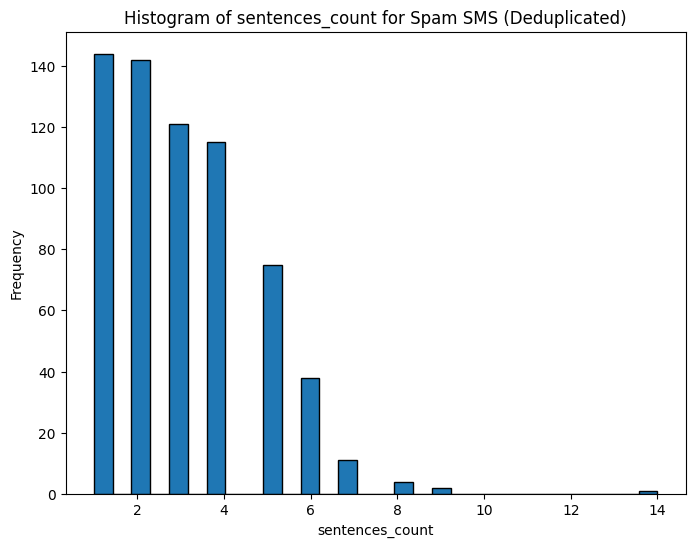

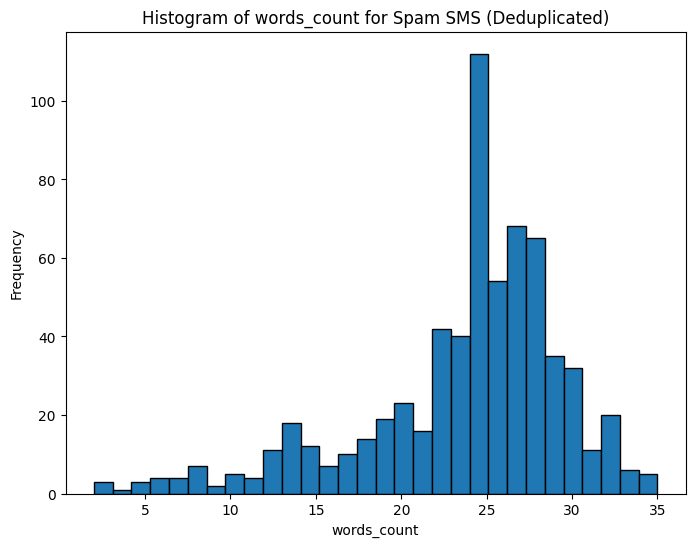

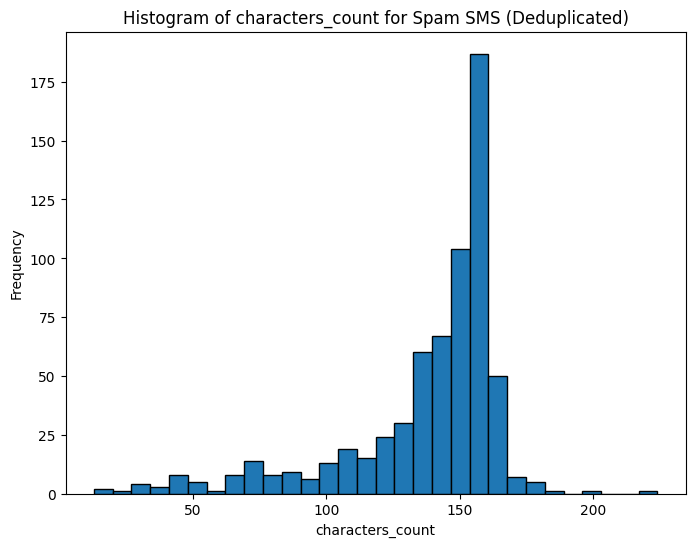

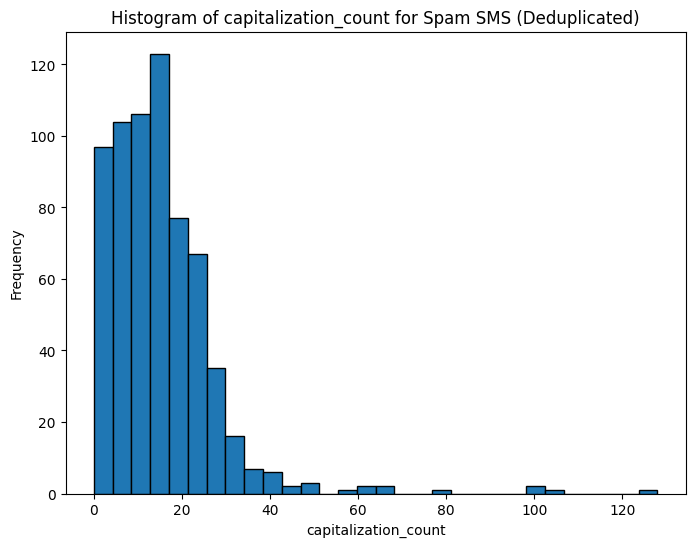

In [ ]:

import matplotlib.pyplot as plt

df_spam_deduplicated = spamonly.drop_duplicates(subset='v2')

df_spam_deduplicated['sentences_count'] = df_spam_deduplicated['v2'].apply(lambda x: len(str(x).split('.')) if isinstance(x, str) else 0)
df_spam_deduplicated['words_count'] = df_spam_deduplicated['v2'].str.split().str.len()
df_spam_deduplicated['characters_count'] = df_spam_deduplicated['v2'].str.len()
df_spam_deduplicated['capitalization_count'] = df_spam_deduplicated['v2'].apply(count_uppercase)

features = ['sentences_count', 'words_count', 'characters_count', 'capitalization_count']
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.hist(df_spam_deduplicated[feature], bins=30, edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature} for Spam SMS (Deduplicated)')
    plt.show()


Q32

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_no_duplicates['target_encoded'] = le.fit_transform(df_no_duplicates['v1'])

df_no_duplicates['numeric_count'] = df_no_duplicates['v2'].str.count(r'\d')
df_no_duplicates['capitalization'] = df_no_duplicates['v2'].apply(count_uppercase)
df_no_duplicates['words_count'] = df_no_duplicates['v2'].str.split().str.len()
df_no_duplicates['sentences_count'] = df_no_duplicates['v2'].apply(lambda x: len(str(x).split('.')) if isinstance(x, str) else 0)

print(df_no_duplicates[['numeric_count', 'capitalization', 'words_count', 'sentences_count', 'target_encoded']].corr())


                 numeric_count  capitalization  words_count  sentences_count  \
numeric_count         1.000000        0.343018     0.285786         0.045457   
capitalization        0.343018        1.000000     0.320293         0.096909   
words_count           0.285786        0.320293     1.000000         0.406421   
sentences_count       0.045457        0.096909     0.406421         1.000000   
target_encoded        0.835803        0.339780     0.286576         0.018118   

                 target_encoded  
numeric_count          0.835803  
capitalization         0.339780  
words_count            0.286576  
sentences_count        0.018118  
target_encoded         1.000000  


<ipython-input-25-58e1a3094279>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['target_encoded'] = le.fit_transform(df_no_duplicates['v1'])
<ipython-input-25-58e1a3094279>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates['numeric_count'] = df_no_duplicates['v2'].str.count(r'\d')  # Example: Count of digits
<ipython-input-25-58e1a3094279>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =